# NASA DASH link Flight Data

source: https://c3.nasa.gov/dashlink/projects/85/resources/ [1]

Md Shahidullah Kawsar
<br>kawsar.usf@gmail.com

What to do: The following are the sections you need in your report out:

1. What is the data about? How much data and what kind of data? 5 bullets with numbers to support inference

2. Use any representative sample file to generate some visualizations. Give 5 inference

3. Develop a logic such that you can filter out flight data that looks incorrect. Develop the logic and then validate the logic with different data file.


1. What is the data about? How much data and what kind of data? 5 bullets with numbers to support inference

- The NASA DASH link site has information about 36 aircrafts. Each plane is identified by a three digit tail number. For the initial data analysis, I have used tail 687. For each aircraft, there are 8-9 zip files. Each zip file contains 450-650 .mat files (nearly 800 MB of data). Each .mat contains information during a flight. 

- In the '687200403251438.mat' file, 
    <br>687 represents a plane's tail ID
    <br>2004 is the year
    <br>03 is the month
    <br>25 is the day
    <br>14 is the hour and
    <br>38 is the min [2] 
<br> Each .mat file has 186 feature variables. Along with the data, it contains the sampling rate of each variable, units of a few particular variables, description (full form) of the variables.


- Different feature variable has different sampling rate. 
<br>sampling rate = number of samples / time
<br>Thus, sample time = number of samples / sampling rate 
<br>When the sampling rate = 4 and the number of samples = 16272, sample time = 16272/4 = 4068 seconds


- The dataset can be used for anomaly detection such as engine failures. From [3] if exhaust gas temperature (EGT_1) drops significantly, we know the engine has shutdown. Exhaust gas temperature (EGT_1) depends on fan speed (N1_1), core speed (N2_1) and total air temperature ('TAT). Here, total air temperature has sampling rate 1 and other variables have sampling rate 4.


- From [3], if fuel flow (FF_1) drops significantly, we know the engine has shutdown. Fuel flow (FF_1) depends on power lever angle (PLA_1). Here, all variables have same sampling rate 4.

references: 
<br>[1] https://c3.nasa.gov/dashlink/projects/85/resources/
<br>[2] https://github.com/alacer/flightdata
<br>[3] R. Lee, M. Rajabi, "Assessing NuPIC and CLA in a Machine Learning Context using NASA Aviation Datasets," 

In [426]:
# import the required libraries and packages
import pandas as pd
import numpy as np

# to load the .mat file 
import mat4py

# visualization 
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data (.mat files)

In [427]:
def read_data(input):
    """
    reads the input .mat file and creates an array and a dataframe 
    args:
        input_filename: .mat file
    returns:
        dataframe
    """
    
    # read one sample data of a flight
    matrix = mat4py.loadmat(input)

    # to look inside this unstructured data, let's create a pandas dataframe
    unstructured_df = pd.DataFrame(matrix)
    
    return matrix, unstructured_df


In [428]:
# create a variable for the input file
input_1_filename = '687200403251602.mat'

# read the input .mat file
mat, unstructured_data = read_data(input_1_filename)

# Let's check the data
display(unstructured_data)

,VAR_1107,VAR_2670,VAR_5107,VAR_6670,FPAC,BLAC,CTAC,TH,MH,EGT_1,...,ATEN,LATP,FIRE_1,FIRE_2,FIRE_3,FIRE_4,FGC3,ILSF,ESN_1,ESN_2
data,"[[584], [584], [584], [584], [584], [584], [58...","[[1465], [1465], [1465], [1465], [1465], [1465...","[[2632], [2632], [2632], [2632], [2632], [2632...","[[3513], [3513], [3513], [3513], [3513], [3513...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.009770000353455544], [0.009770000353455544...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[52.8481559753418], [52.370262145996094], [51...","[[58.18735122680664], [57.7094612121582], [57....","[[129.0], [129.0], [129.0], [129.0], [129.0], ...",...,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...","[[40.00002120033298], [40.00002120033298], [40...","[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...","[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...","[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...","[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...","[[120], [120], [120], [120], [120], [120], [12...","[[1109093], [1109093], [1109093], [1109093], [...","[[7989], [7989], [7989], [7989], [7989], [7989...","[[7947], [7947], [7947], [7947], [7947], [7947..."
Rate,0.25,0.25,0.25,0.25,16,16,16,4,4,4,...,1,1,1,1,1,1,1,1,0.25,0.25
Units,<units>,<units>,<units>,<units>,G,G,G,DEG,DEG,DEG,...,,DEG,,,,,,,UNITS,UNITS
Description,SYNC WORD FOR SUBFRAME 1,SYNC WORD FOR SUBFRAME 2,SYNC WORD FOR SUBFRAME 3,SYNC WORD FOR SUBFRAME 4,FLIGHT PATH ACCELERATION,BODY LONGITUDINAL ACCELERATION,CROSS TRACK ACCELERATION,TRUE HEADING LSP,MAGNETIC HEADING LSP,EXHAUST GAS TEMPERATURE 1,...,A/T ENGAGE STATUS,LATITUDE POSITION LSP,ENGINE FIRE #1,ENGINE FIRE #2,ENGINE FIRE #3,ENGINE FIRE #4,DFGS STATUS 3,ILS FREQUENCY LSP,ENGINE SERIAL NUMBER 1 LSP,ENGINE SERIAL NUMBER 2 LSP
Alpha,1107,2670,5107,6670,FPAC,BLAC,CTAC,TH,MH,EGT.1,...,ATEN,LATP,FIRE.1,FIRE.2,FIRE.3,FIRE.4,FGC3,ILSF,ESN.1,ESN.2


### Example variable selection 

In [429]:
# select a few columns
fan_speed = ['N1_1', 'N1_2', 'N1_3', 'N1_4']
core_speed = ['N2_1', 'N2_2', 'N2_3', 'N2_4']
total_air_temperature = ['TAT']
exhaust_gas_temperature = ['EGT_1', 'EGT_2', 'EGT_3', 'EGT_4'] # target

# if exhaust gas temperature drops significantly, we know the engine has shutdown.
# ref: R. Lee, M. Rajabi, "Assessing NuPIC and CLA in a Machine Learning Context using NASA Aviation Datasets"

# create a list of the selected columns
var_list_1 = fan_speed + core_speed + total_air_temperature + exhaust_gas_temperature

# remove the other columns
unstructured_data = unstructured_data[var_list_1]

display(unstructured_data)

,N1_1,N1_2,N1_3,N1_4,N2_1,N2_2,N2_3,N2_4,TAT,EGT_1,EGT_2,EGT_3,EGT_4
data,"[[1.21875], [1.21875], [1.21875], [1.21875], [...","[[0.9375], [0.9375], [0.9375], [0.9375], [0.93...","[[1.28125], [1.28125], [1.28125], [1.28125], [...","[[1.5], [1.5], [1.5], [1.5], [1.5], [1.5], [1....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[22.5], [22.5], [22.5], [22.5], [22.5], [22.5...","[[129.0], [129.0], [129.0], [129.0], [129.0], ...","[[118.5], [118.5], [118.5], [118.5], [118.5], ...","[[113.0], [113.0], [113.0], [113.0], [113.0], ...","[[133.0], [133.0], [133.0], [133.0], [133.0], ..."
Rate,4,4,4,4,4,4,4,4,1,4,4,4,4
Units,%RPM,%RPM,%RPM,%RPM,%RPM,%RPM,%RPM,%RPM,DEG,DEG,DEG,DEG,DEG
Description,FAN SPEED 1 LSP,FAN SPEED 2 LSP,FAN SPEED 3 LSP,FAN SPEED 4 LSP,CORE SPEED 1 LSP,CORE SPEED 2 LSP,CORE SPEED 3 LSP,CORE SPEED 4 LSP,TOTAL AIR TEMPERATURE,EXHAUST GAS TEMPERATURE 1,EXHAUST GAS TEMPERATURE 2,EXHAUST GAS TEMPERATURE 3,EXHAUST GAS TEMPERATURE 4
Alpha,N1.1,N1.2,N1.3,N1.4,N2.1,N2.2,N2.3,N2.4,TAT,EGT.1,EGT.2,EGT.3,EGT.4


### creating pandas dataframe

In [430]:
def create_structured_data(matrix, var_list, col_dict):
    """
    Creates a structured data from the unstructured format
    
    Args: 
        matrix (array): raw data from the .mat file
        var_list (list): selected columns
        col_dict (dicct): key value pairs of the given column name and readable column name
        
    Returns:
        structured_df (dataframe): pandas dataframe for data analysis
    """
    
    # create a new matrix to save all data in a dataframe
    # removing the Rate, Units, Description and Alpha variables
    # we'll keep only the 'data' variable
    df = []
    for i in var_list:
        data = [val for key, val in matrix[i].items()]
        col = np.squeeze(data[0])
        df.append(col)

    # create a structured dataframe for further data analysis
    structured_df = pd.DataFrame(df).transpose()

    # assign the column names based on the previously created list of columns
    # because the structured_df is a matrix which doesn't the column names
    structured_df.columns = var_list

    # rename the columns again for better readability
    structured_df = structured_df.rename(columns= col_dict) 
    
    return structured_df

In [431]:
# renaming the columns for more readablility
col_dict_1 = {'N1_1': 'fan_speed_1', 'N1_2': 'fan_speed_2', 
              'N1_3': 'fan_speed_3', 'N1_4': 'fan_speed_4',
              'N2_1': 'core_speed_1', 'N2_2': 'core_speed_2', 
              'N2_3': 'core_speed_3', 'N2_4': 'core_speed_4',
              'TAT': 'total_air_temp',
              'EGT_1': 'exhaust_gas_temp_1', 'EGT_2': 'exhaust_gas_temp_2', 
              'EGT_3': 'exhaust_gas_temp_3', 'EGT_4': 'exhaust_gas_temp_4'}

# create a new dataframe
structured_data = create_structured_data(mat, var_list_1, col_dict_1)

# check for the data types, missing values, and data shape
print(structured_data.info())

display(structured_data.head())

# check the details of the data
display(structured_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11776 entries, 0 to 11775
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fan_speed_1         11776 non-null  float64
 1   fan_speed_2         11776 non-null  float64
 2   fan_speed_3         11776 non-null  float64
 3   fan_speed_4         11776 non-null  float64
 4   core_speed_1        11776 non-null  float64
 5   core_speed_2        11776 non-null  float64
 6   core_speed_3        11776 non-null  float64
 7   core_speed_4        11776 non-null  float64
 8   total_air_temp      2944 non-null   float64
 9   exhaust_gas_temp_1  11776 non-null  float64
 10  exhaust_gas_temp_2  11776 non-null  float64
 11  exhaust_gas_temp_3  11776 non-null  float64
 12  exhaust_gas_temp_4  11776 non-null  float64
dtypes: float64(13)
memory usage: 1.2 MB
None


,fan_speed_1,fan_speed_2,fan_speed_3,fan_speed_4,core_speed_1,core_speed_2,core_speed_3,core_speed_4,total_air_temp,exhaust_gas_temp_1,exhaust_gas_temp_2,exhaust_gas_temp_3,exhaust_gas_temp_4
0,1.21875,0.9375,1.28125,1.5,0.0,0.0,0.0,0.0,22.5,129.0,118.5,113.0,133.0
1,1.21875,0.9375,1.28125,1.5,0.0,0.0,0.0,0.0,22.5,129.0,118.5,113.0,133.0
2,1.21875,0.9375,1.28125,1.5,0.0,0.0,0.0,0.0,22.5,129.0,118.5,113.0,133.0
3,1.21875,0.9375,1.28125,1.5,0.0,0.0,0.0,0.0,22.5,129.0,118.5,113.0,133.0
4,1.21875,0.9375,1.28125,1.5,0.0,0.0,0.0,0.0,22.5,129.0,118.5,113.0,133.0


,fan_speed_1,fan_speed_2,fan_speed_3,fan_speed_4,core_speed_1,core_speed_2,core_speed_3,core_speed_4,total_air_temp,exhaust_gas_temp_1,exhaust_gas_temp_2,exhaust_gas_temp_3,exhaust_gas_temp_4
count,11776.000000,11776.000000,11776.000000,11776.000000,11776.000000,11776.000000,11776.000000,11776.000000,2944.000000,11776.000000,11776.000000,11776.000000,11776.000000
mean,57.071594,57.434342,57.754907,57.569347,70.933201,71.794253,72.201198,72.247988,19.124745,471.774499,473.433721,467.448412,461.159137
std,28.911732,28.465874,27.934958,28.021279,23.322992,22.089137,20.894766,20.684765,3.958586,95.898266,94.523478,93.129929,74.150483
min,1.218750,0.937500,1.281250,1.500000,0.000000,0.000000,0.000000,0.000000,11.750000,120.000000,110.500000,107.000000,131.000000
25%,27.281250,30.125000,28.218750,26.406250,53.210938,57.718750,54.937500,52.000000,15.750000,440.000000,425.500000,412.000000,426.500000
50%,60.687500,60.843750,60.687500,60.687500,80.687500,80.750000,80.906250,80.093750,18.250000,467.000000,475.000000,465.000000,452.000000
75%,84.031250,83.937500,84.000000,84.031250,87.687500,87.593750,87.312500,87.843750,22.500000,518.500000,523.000000,515.000000,501.000000
max,93.312500,93.343750,93.437500,93.343750,93.937500,94.156250,94.312500,94.343750,27.500000,602.500000,594.500000,601.000000,571.000000


### Determining the sampling time

In the current dataframe, columns have different sampling rate.
<br>For the fan speed, core speed and exhaust gas temperature, the sampling rates are 4
<br>For the total air temperature, the sampling rate is 1
<br>sampling rate = number of samples / time
<br>Thus, sample time = number of samples / sampling rate 
<br>Example: When the sampling rate = 4 and the number of samples = 16272, sample time = 16272/4 = 4068 seconds

<br>Create a new dataframe because only the total air temperature column has sampling rate = 1. To bring the all columns in a same sampling rate, I'll take the mean (average) of each 4 samples

In [432]:
def deter_sample_time(sampling_rate, df):
    """
    Determines the sampling time
    Args:
        sampling_rate (float): sample time = number of samples / sampling rate 
        df (dataframe): to get the no. of samples
        
    Returns:
        sample_time(int)
    """
    
    # find the no. of samples from the dataframe
    number_of_samples = df.shape[0]
    
    print('number_of_samples = ', number_of_samples)
    
    return int(number_of_samples/sampling_rate)

# In this case
sampling_rate = 4

# determine the sample time
sample_time = deter_sample_time(sampling_rate, structured_data)

print('sample_time = ', sample_time, 'seconds')

number_of_samples =  11776
sample_time =  2944 seconds


### Creating a dataframe with same sampling rate in each column

In [433]:
def create_flight_data(df, droppping_col, sampling_rate, sample_time):
    
    """
    Creates a dataframe with same sampling rate in each column
    Args:
        df (dataframe): dataframe that needs to be sampled
        droppping_col (str): the column which has sampling rate = 1
        sampling_rate (float): given in the data
        sample_time (int): sample time = number of samples / sampling rate
        
    Returns:
        flight_df (dataframe): sampled dataframe
    """

    # drop the total air temperature column and create a new dataframe
    flight_df = df.drop(droppping_col, axis=1)

    # group the rest of the columns by the mean of every 4 samples
    flight_df = flight_df.groupby(np.arange(len(flight_df))//sampling_rate).mean()

    # bring back the total air temperature column
    flight_df[droppping_col] = df[droppping_col].values[: sample_time]
    
    return flight_df

### Sampled data

In [434]:
# create a dataframe with same sampling rate in each columns
flight_data = create_flight_data(structured_data, 'total_air_temp', sampling_rate, sample_time)

display(flight_data.head())

print(flight_data.info())

display(flight_data.describe())

,fan_speed_1,fan_speed_2,fan_speed_3,fan_speed_4,core_speed_1,core_speed_2,core_speed_3,core_speed_4,exhaust_gas_temp_1,exhaust_gas_temp_2,exhaust_gas_temp_3,exhaust_gas_temp_4,total_air_temp
0,1.21875,0.9375,1.28125,1.5,0.0,0.0,0.0,0.0,129.0,118.5,113.0,133.00,22.5
1,1.21875,0.9375,1.28125,1.5,0.0,0.0,0.0,0.0,129.0,118.5,113.0,132.25,22.5
2,1.21875,0.9375,1.28125,1.5,0.0,0.0,0.0,0.0,128.5,118.5,113.0,132.00,22.5
3,1.21875,0.9375,1.28125,1.5,0.0,0.0,0.0,0.0,128.0,117.5,113.0,132.00,22.5
4,1.21875,0.9375,1.28125,1.5,0.0,0.0,0.0,0.0,127.0,117.5,113.0,132.00,22.5


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2944 entries, 0 to 2943
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fan_speed_1         2944 non-null   float64
 1   fan_speed_2         2944 non-null   float64
 2   fan_speed_3         2944 non-null   float64
 3   fan_speed_4         2944 non-null   float64
 4   core_speed_1        2944 non-null   float64
 5   core_speed_2        2944 non-null   float64
 6   core_speed_3        2944 non-null   float64
 7   core_speed_4        2944 non-null   float64
 8   exhaust_gas_temp_1  2944 non-null   float64
 9   exhaust_gas_temp_2  2944 non-null   float64
 10  exhaust_gas_temp_3  2944 non-null   float64
 11  exhaust_gas_temp_4  2944 non-null   float64
 12  total_air_temp      2944 non-null   float64
dtypes: float64(13)
memory usage: 322.0 KB
None


,fan_speed_1,fan_speed_2,fan_speed_3,fan_speed_4,core_speed_1,core_speed_2,core_speed_3,core_speed_4,exhaust_gas_temp_1,exhaust_gas_temp_2,exhaust_gas_temp_3,exhaust_gas_temp_4,total_air_temp
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,57.071594,57.434342,57.754907,57.569347,70.933201,71.794253,72.201198,72.247988,471.774499,473.433721,467.448412,461.159137,19.124745
std,28.913666,28.467529,27.936867,28.023005,23.324137,22.090091,20.895753,20.685535,95.903302,94.526294,93.130462,74.150223,3.958586
min,1.218750,0.937500,1.281250,1.500000,0.000000,0.000000,0.000000,0.000000,120.000000,110.500000,107.000000,132.000000,11.750000
25%,27.427734,30.125000,28.255859,26.451172,53.533203,57.732422,54.957031,52.052734,440.250000,425.500000,412.000000,426.500000,15.750000
50%,60.593750,60.812500,60.632812,60.632812,80.656250,80.730469,80.894531,80.089844,467.125000,475.750000,465.000000,451.625000,18.250000
75%,84.009766,83.968750,84.000000,84.023438,87.656250,87.593750,87.306641,87.828125,518.250000,522.750000,515.031250,501.000000,22.500000
max,93.312500,93.304688,93.312500,93.335938,93.875000,94.156250,93.765625,94.250000,602.500000,594.500000,601.000000,571.000000,27.500000


### Data Visualization

2. Use any representative sample file to generate some visualizations. Give 5 inference

- From the histogram, we can see that fan speed, core speed, total air temperature, and exhaust gas temperature are not normally distributed.


- From the violinplots, we can the density of the variables. Violinplots also represents the median, Interquartile range (IQR) like boxplots. Fan speed and core speed variables have unit in %RPM  and temperature variables are in DEG. The values of the core speed and fan speed ranges from 0 to 95% RPM. Total air temperature ranges from 13 to 29 DEG. Exhaus gas temperatures ranges from 73 to 605 DEG.


- From the boxplots, we can see that core_speed_3, and exhaust gas temperature variables has few outliers.


- From the heatmap of the Pearson correlation coefficients, the exhaust_gas_temp variables have strong positive linear correlation with the fan speed and core speed variables. The exhaust gas temperature variables have moderate negative correlation with the total air temperature


- We can verify the strong positive correlation of the fan speed, core speed and exhaust gas temperature variables by using the scatterplots and drawing a regression line over the points. For the fan speed greater than 25% RPM, the exhaust gas temperature variables are positively correlated. For the core speed greater than 50% RPM, the exhaust gas temperature variables are positively correlated. 

### Histogram
From the histogram, we can see that fan speed, core speed, total air temperature, and exhaust gas temperature are not normally distributed.

In [435]:
def distribution(df):
    
    """
    Creates visualization of the data distribution
    Args:
        df (dataframe): sampled dataframe
    Returns: 
        histograms of each variable
    """
    
    # list of columns of the given dataframe
    col_list = df.columns
    
    plt.figure(figsize=(12,8))
    
    # create a loop to plot the histograms
    for i in range(len(col_list)):
        plt.subplot(4, 4, i+1)
        sns.histplot(data=df, x=col_list[i], kde=True, bins=20)
        plt.suptitle('Distribution of the feature and target variables')
        plt.tight_layout()
    plt.show()

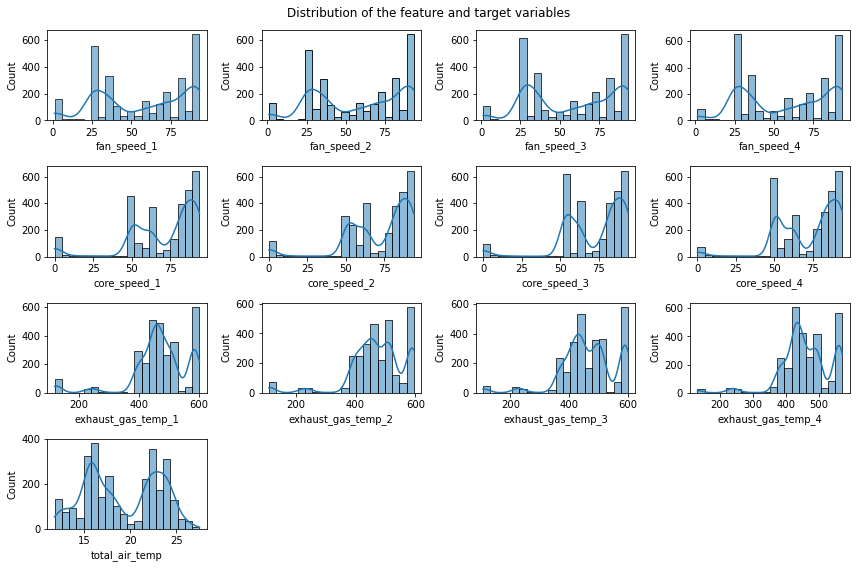

In [436]:
distribution(flight_data)

### Violinplots
From the violinplots, we can the density of the variables. Violinplots also represents the median, Interquartile range (IQR) like boxplots. Fan speed and core speed variables have unit in %RPM  and temperature variables are in DEG. The values of the core speed and fan speed ranges from 0 to 95% RPM. Total air temperature ranges from 13 to 29 DEG. Exhaus gas temperatures ranges from 73 to 605 DEG.

In [437]:
def violinplots(df):
    
    """
    Creates visualization of the data distribution
    Args:
        df (dataframe): sampled dataframe
    Returns: 
        violinplot of each variable
    """    
    
    # list of columns of the given dataframe
    col_list = df.columns    
    
    plt.figure(figsize=(12,8))
    for i in range(len(col_list)):
        plt.subplot(4, 4, i+1)
        sns.violinplot(data=df, x=col_list[i])
        plt.suptitle('Violinplot of the feature and target variables')
        plt.tight_layout()
    plt.show()

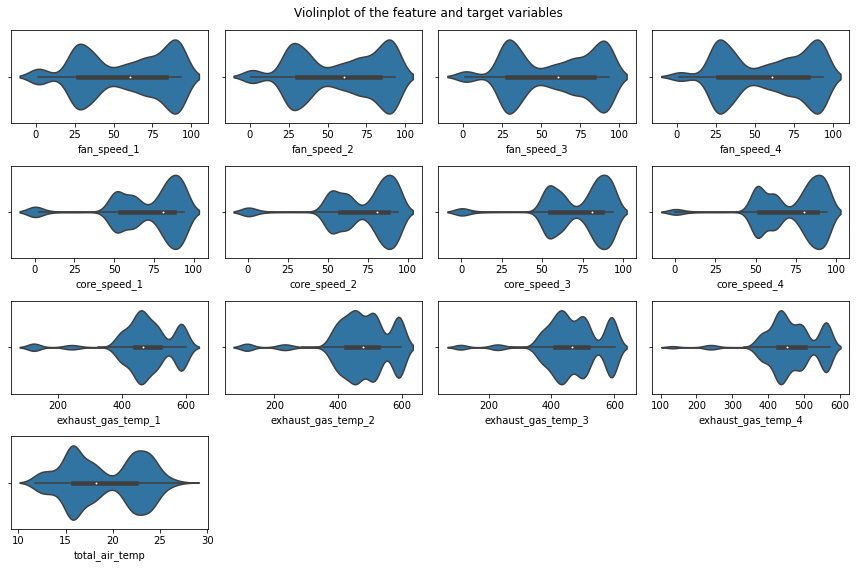

In [438]:
violinplots(flight_data)

### Boxplots
From the boxplots, we can see that core_speed_3, and exhaust gas temperature variables has few outliers.

In [439]:
def boxplots(df):
    
    """
    Creates visualization of the data distribution
    Args:
        df (dataframe): sampled dataframe
    Returns: 
        violinplot of each variable
    """    
    
    # list of columns of the given dataframe
    col_list = df.columns 
    
    plt.figure(figsize=(12,8))
    for i in range(len(col_list)):
        plt.subplot(4, 4, i+1)
        sns.boxplot(data=df, x=col_list[i])
        plt.suptitle('Boxplots of the feature and target variables')
        plt.tight_layout()
    plt.show()


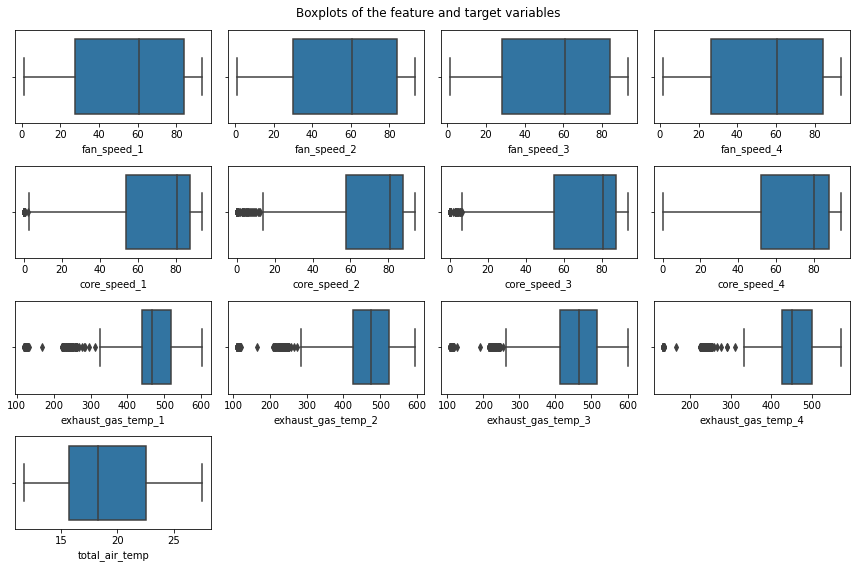

In [440]:
boxplots(flight_data)

### Heatmap of Pearson correlation coefficients
From the heatmap of the Pearson correlation coefficients, the exhaust_gas_temp variables have strong positive linear correlation with the fan speed and core speed variables. The exhaust gas temperature variables have moderate negative correlation with the total air temperature

In [441]:
def correlation_heatmap(df):
    """
    Creates a heatmap of the Pearson correlation coefficients
    Args:
        df (dataframe): sampled flight data
    Returns:
        heatmap
    """
    
    # find the Pearson correlation coefficients
    correlation_matrix = df.corr()

    # create a mask of lower triangular matrix
    mask = np.zeros_like(correlation_matrix)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (10,10))

    # create a heatmap of the correlation coefficients
    sns.heatmap(correlation_matrix, linewidths=0.2, 
                vmax=1.0, vmin=-1., 
                square=True, cmap='RdYlGn', 
                linecolor='white', annot=True, mask = mask)
    
    plt.title('Heatmap of the Pearson Correlation Coefficients')

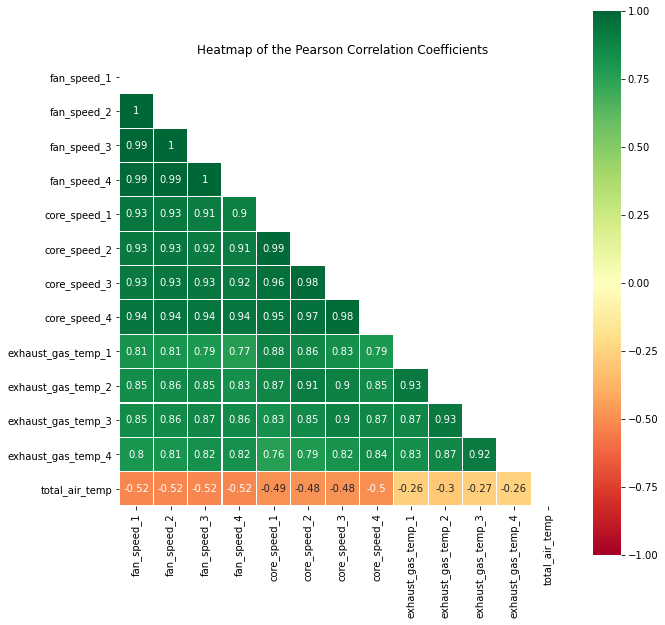

In [442]:
correlation_heatmap(flight_data)

### Variable creation for regression plot and time-series plot

In [443]:
Fan_Speed = ['fan_speed_1', 'fan_speed_2', 'fan_speed_3', 'fan_speed_4']
Core_Speed = ['core_speed_1', 'core_speed_2', 'core_speed_3', 'core_speed_4']
Exhaust_Gas_Temp = ['exhaust_gas_temp_1', 'exhaust_gas_temp_2', 'exhaust_gas_temp_3', 'exhaust_gas_temp_4']

VAR_list = [Fan_Speed, Core_Speed, Exhaust_Gas_Temp]

### Regression plot
We can verify the strong positive correlation of the fan speed, core speed and exhaust gas temperature variables by using the scatterplots and drawing a regression line over the points. For the fan speed greater than 25% RPM, the exhaust gas temperature variables are positively correlated. For the core speed greater than 50% RPM, the exhaust gas temperature variables are positively correlated. 

In [444]:
def regression_plot(feature, target, df, color):
    """
    Creates a scatterplot along with a regression line
    Args:
        feature (list): list of feature variables
        target (list): list of target variables
        df (dataframe): sampled flight data
        color (str): choose any color for the scatterplots
    Returns:
        scatterplot with a regression line
    """
    
    plt.figure(figsize=(15,4))
    for i in range(len(feature)):
        plt.subplot(1, len(feature), i+1)
        sns.regplot(x=feature[i], y=target[i], data=df, color=color, line_kws={"color": "red"})
        plt.xlabel(feature[i])
        plt.ylabel(target[i])
        plt.xticks(np.arange(0, df[feature[i]].max(), 10).tolist())
        plt.yticks(np.arange(0, df[target[i]].max(), 100).tolist())
        plt.suptitle('Scatterplot with regression line')
        plt.tight_layout()
    plt.show()

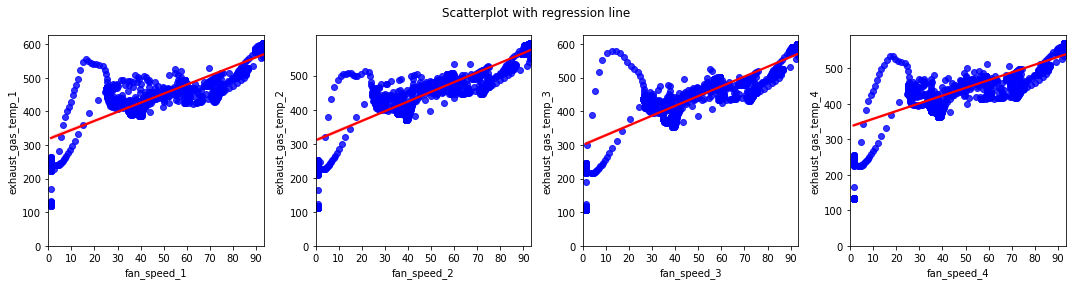

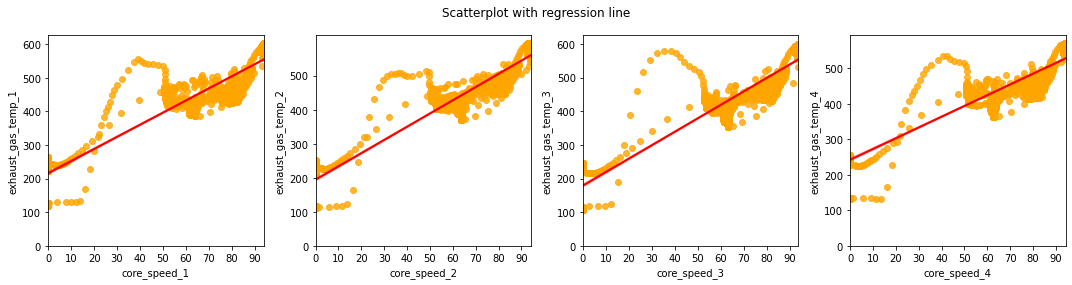

In [445]:
regression_plot(Fan_Speed, Exhaust_Gas_Temp, flight_data, 'blue')
regression_plot(Core_Speed, Exhaust_Gas_Temp, flight_data, 'orange')

3. Develop a logic such that you can filter out flight data that looks incorrect. Develop the logic and then validate the logic with different data file.

flight data 1: '687200403251602.mat'
<br>flight data 2: '687200403261438.mat'

- From [3] if exhaust gas temperature (EGT) drops significantly, we know the engine has shutdown. Exhaust gas temperature (EGT) depends on fan speed (N1), core speed (N2) and total air temperature ('TAT'). 
At first, I sampled both the datasets in a same sampling rate 4. Now, let's compare their time-series plot of the variables. 

[**No anomaly**] In flight data 1, the sampling time is 2944 seconds. The aircraft has 4 engines each associated with a fan speed, core speed and exhaust gas temperature. All the four exhaust gas temperature variables drops simultaneously nearly at the end of the sampling time which indicates a safe landing phase.

[**Anomaly**] In flight data 2, the sampling time is 4528 seconds. The aircraft has 4 engines each associated with a fan speed, core speed and exhaust gas temperature. At sampling time 3750 seconds, the fan speed 1 and core speed 1 suddenly significantly reduced and thus exhaust gas temperature 1 is also decreasing drastically. That means engine 1 has shut down before the 800 seconds (nearly 14 minutes) of landing or the aircraft was forced to do landing due to an anomaly in the engine. Then, engine 3, engine 2 and engine 4 shut down respectively.

In [446]:
def time_series_plot(df, col_list, sample_time):
    """
    Creates a time-series plot 
    Args:
        df (dataframe): sampled data
        col_list (list): list of columns
        sample_time (int): in seconds
        
    Returns:
        line plots
    """
    # list of colors for each subplot
    color = ['blue', 'red', 'orange', 'green']
    
    # create a list of time (seconds)
    time = [i for i in range(df.shape[0])]
    
    plt.figure(figsize=(15,8))
    
    for i in range(3):
        plt.subplot(3,1,i+1)

        for j in range(len(col_list[i])):
            
            # line plot
            plt.plot(time, df[col_list[i][j]], color = color[j], label = col_list[i][j])
            
            # set the xlabel
            plt.xlabel('time (seconds)')
            
            # set the ylabel
            plt.ylabel(col_list[i][j][:-2])
            
            # set the x-axis values
            plt.xticks(np.arange(0, sample_time+500, 500).tolist())
            
            # legend on
            plt.legend()
            
            # fit the figures in the layout
            plt.tight_layout()
            
            # set the title
            plt.suptitle("time-series plot")
    plt.show()

### Time-Series plot of the flight data 1

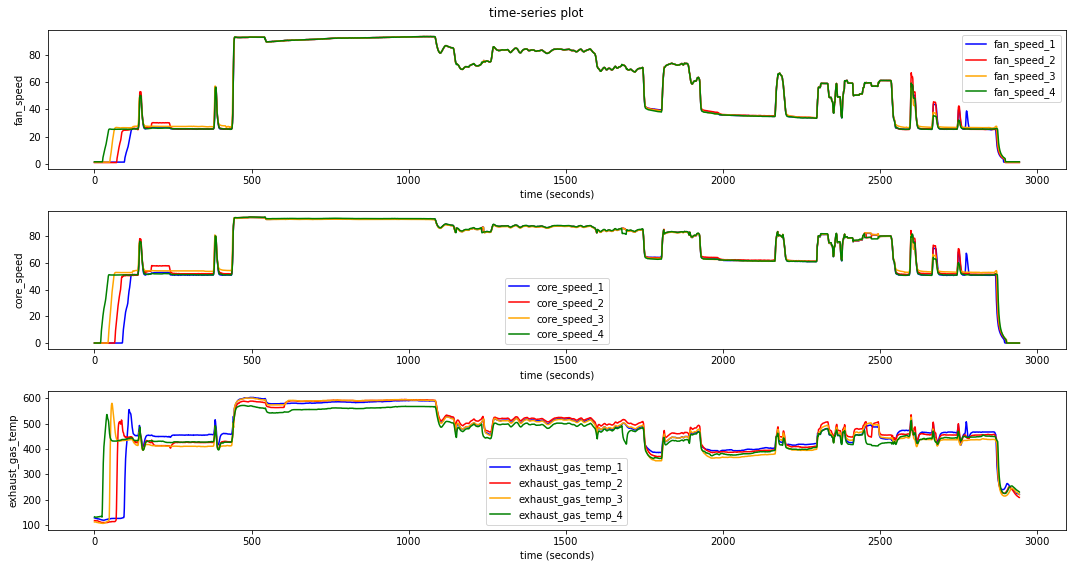

In [447]:
time_series_plot(flight_data, VAR_list, sample_time)

### Loading flight data 2

In [448]:
# Let's read another file
input_2_filename = '687200403261438.mat'

# load the data
mat_2, unstructured_data_2 = read_data(input_2_filename)

# keep the variables we want to analyze
unstructured_data_2 = unstructured_data_2[var_list_1]

# create a pandas dataframe
structured_data_2 = create_structured_data(mat_2, var_list_1, col_dict_1)

# sampling rate of the new data
sampling_rate_2 = 4
sample_time_2 = deter_sample_time(sampling_rate_2, structured_data_2)

print('sample_time = ', sample_time_2, 'seconds')

# sampled flight data
flight_data_2 = create_flight_data(structured_data_2, 'total_air_temp', sampling_rate_2, sample_time_2)


number_of_samples =  18112
sample_time =  4528 seconds


### Time-Series plot of the flight data 2

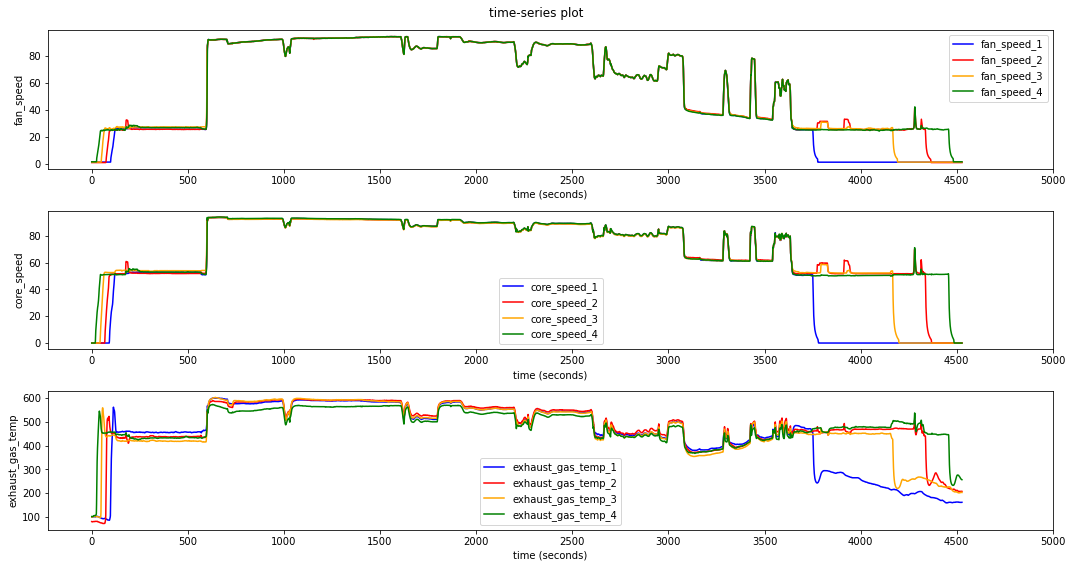

In [449]:
time_series_plot(flight_data_2, VAR_list, sample_time_2)